# 探索数据集/POI

In [1]:
import pickle
enron_data = pickle.load(open("./ud120-projects/final_project/final_project_dataset.pkl", "r"))

In [2]:
people_number = len(enron_data)
print people_number

146


In [2]:
poi = {name:info for name,info in enron_data.iteritems() if info['poi']==1}

In [4]:
len(poi)

18

In [5]:
poi_names = enron_data.keys()
poi_names.sort()
print poi_names

['ALLEN PHILLIP K', 'BADUM JAMES P', 'BANNANTINE JAMES M', 'BAXTER JOHN C', 'BAY FRANKLIN R', 'BAZELIDES PHILIP J', 'BECK SALLY W', 'BELDEN TIMOTHY N', 'BELFER ROBERT', 'BERBERIAN DAVID', 'BERGSIEKER RICHARD P', 'BHATNAGAR SANJAY', 'BIBI PHILIPPE A', 'BLACHMAN JEREMY M', 'BLAKE JR. NORMAN P', 'BOWEN JR RAYMOND M', 'BROWN MICHAEL', 'BUCHANAN HAROLD G', 'BUTTS ROBERT H', 'BUY RICHARD B', 'CALGER CHRISTOPHER F', 'CARTER REBECCA C', 'CAUSEY RICHARD A', 'CHAN RONNIE', 'CHRISTODOULOU DIOMEDES', 'CLINE KENNETH W', 'COLWELL WESLEY', 'CORDES WILLIAM R', 'COX DAVID', 'CUMBERLAND MICHAEL S', 'DEFFNER JOSEPH M', 'DELAINEY DAVID W', 'DERRICK JR. JAMES V', 'DETMERING TIMOTHY J', 'DIETRICH JANET R', 'DIMICHELE RICHARD G', 'DODSON KEITH', 'DONAHUE JR JEFFREY M', 'DUNCAN JOHN H', 'DURAN WILLIAM D', 'ECHOLS JOHN B', 'ELLIOTT STEVEN', 'FALLON JAMES B', 'FASTOW ANDREW S', 'FITZGERALD JAY L', 'FOWLER PEGGY', 'FOY JOE', 'FREVERT MARK A', 'FUGH JOHN L', 'GAHN ROBERT S', 'GARLAND C KEVIN', 'GATHMANN WILLIAM D

In [10]:
enron_data['LAY KENNETH L'].keys()

['salary',
 'to_messages',
 'deferral_payments',
 'total_payments',
 'exercised_stock_options',
 'bonus',
 'restricted_stock',
 'shared_receipt_with_poi',
 'restricted_stock_deferred',
 'total_stock_value',
 'expenses',
 'loan_advances',
 'from_messages',
 'other',
 'from_this_person_to_poi',
 'poi',
 'director_fees',
 'deferred_income',
 'long_term_incentive',
 'email_address',
 'from_poi_to_this_person']

In [4]:
enron_data['LAY KENNETH L']['to_messages']

4273

In [7]:
enron_data['LAY KENNETH L']['total_payments']

103559793

In [8]:
enron_data['SKILLING JEFFREY K']['total_payments']

8682716

In [9]:
enron_data['FASTOW ANDREW S']['total_payments']

2424083

In [19]:
quantified_salary = [info['salary'] for name,info in enron_data.iteritems() if info['salary'] != 'NaN']
len(quantified_salary)

95

In [20]:
known_emails = [info['email_address'] for name,info in enron_data.iteritems() if info['email_address'] != 'NaN']
len(known_emails)

111

In [35]:
NaN_payments = [info['total_payments'] for name,info in enron_data.iteritems() if info['total_payments'] == 'NaN']
'{0} / {1} = {2}'.format(len(NaN_payments), people_number, 1.00 * len(NaN_payments) / people_number)

'21 / 146 = 0.143835616438'

In [36]:
poi_NaN_payments = [info['total_payments'] for name,info in poi.iteritems() if info['total_payments'] == 'NaN']
'{0} / {1} = {2}'.format(len(poi_NaN_payments), len(poi), 1.00 * len(poi_NaN_payments) / len(poi))

'0 / 18 = 0.0'

# Class 1 : naive_bayes

In [1]:
""" 
    This is the code to accompany the Lesson 1 (Naive Bayes) mini-project. 

    Use a Naive Bayes Classifier to identify emails by their authors
    
    authors and labels:
    Sara has label 0
    Chris has label 1
"""
import sys
from time import time
sys.path.append("./ud120-projects/tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess(
    words_file = "./ud120-projects/tools/word_data.pkl", 
    authors_file="./ud120-projects/tools/email_authors.pkl")

C:\Users\dtzyh\Anaconda3\envs\ml\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


no. of Chris training emails: 7936
no. of Sara training emails: 7884


In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

t0 = time()
clf = GaussianNB()
clf.fit(features_train, labels_train)
print "training time:", round(time()-t0, 3), "s"

t1 = time()
pred = clf.predict(features_test)
print "testing time:", round(time()-t1, 3), "s"

acc = accuracy_score(pred, labels_test)
print "ACC:{0}".format(acc)

training time: 1.531 s
testing time: 0.406 s
ACC:0.973265073948


# Class2 : SVM

In [28]:
""" 
    This is the code to accompany the Lesson 2 (SVM) mini-project.

    Use a SVM to identify emails from the Enron corpus by their authors:    
    Sara has label 0
    Chris has label 1
"""
    
import sys
from time import time
sys.path.append("./ud120-projects/tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess(
    words_file = "./ud120-projects/tools/word_data.pkl", 
    authors_file="./ud120-projects/tools/email_authors.pkl")

no. of Chris training emails: 7936
no. of Sara training emails: 7884


In [31]:
features_train = features_train[:len(features_train)/100] 
labels_train = labels_train[:len(labels_train)/100] 

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

t0 = time()
clf = SVC(kernel='linear')
clf.fit(features_train, labels_train)
print "training time:", round(time()-t0, 3), "s"

t1 = time()
pred = clf.predict(features_test)
print "testing time:", round(time()-t1, 3), "s"

acc = accuracy_score(pred, labels_test)
print "ACC:{0}".format(acc)

training time: 0.141 s
testing time: 1.36 s
ACC:0.884527872582


In [9]:
# Change to rbf kernel.
t0 = time()
clf = SVC(kernel='rbf', C=10000)
clf.fit(features_train, labels_train)
print "training time:", round(time()-t0, 3), "s"

t1 = time()
pred = clf.predict(features_test)
print "testing time:", round(time()-t1, 3), "s"

acc = accuracy_score(pred, labels_test)
print "ACC:{0}".format(acc)

training time: 0.141 s
testing time: 1.219 s
ACC:0.892491467577


# Class3 : decision_tree

In [1]:
""" 
    This is the code to accompany the Lesson 2 (SVM) mini-project.

    Use a SVM to identify emails from the Enron corpus by their authors:    
    Sara has label 0
    Chris has label 1
"""
    
import sys
from time import time
sys.path.append("./ud120-projects/tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess(
    words_file = "./ud120-projects/tools/word_data.pkl", 
    authors_file="./ud120-projects/tools/email_authors.pkl")

C:\Users\dtzyh\Anaconda3\envs\ml\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


no. of Chris training emails: 7936
no. of Sara training emails: 7884


In [2]:
print len(features_train[0])

379


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

t0 = time()
clf = DecisionTreeClassifier(min_samples_split=40)
clf.fit(features_train, labels_train)
print "training time:", round(time()-t0, 3), "s"

t1 = time()
pred = clf.predict(features_test)
print "testing time:", round(time()-t1, 3), "s"

acc = accuracy_score(pred, labels_test)
print "ACC:{0}".format(acc)

training time: 4.641 s
testing time: 0.0 s
ACC:0.966439135381


# Class 4 : regression

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [28]:
"""
    Starter code for the regression mini-project.
    
    Loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble points
    that you'll find yourself in the outliers mini-project).

    Draws a little scatterplot of the training/testing data

    You fill in the regression code where indicated:
"""    


import sys
import pickle
sys.path.append("./ud120-projects/tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("./ud120-projects/final_project/final_project_dataset_modified.pkl", "r") )

### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True, 
                     sort_keys = './ud120-projects/tools/python2_lesson06_keys.pkl')
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"



### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(feature_train, target_train)### draw the scatterplot, with color-coded training and testing points

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

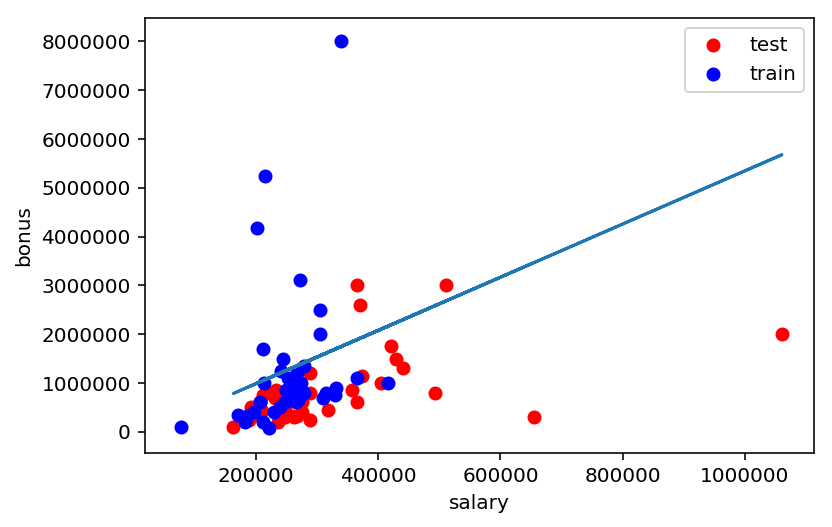

In [29]:
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")


### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

In [30]:
print  reg.coef_ , reg.intercept_

[ 5.44814029] -102360.543294


In [31]:
import numpy as np
print feature_train, target_train
pred = reg.predict(feature_test)
print reg.score(feature_train, target_train)

print reg.score(feature_test, target_test)

[array([ 415189.]), array([ 243293.]), array([ 213625.]), array([ 184899.]), array([ 248546.]), array([ 221003.]), array([ 197091.]), array([ 261516.]), array([ 309946.]), array([ 248146.]), array([ 213999.]), array([ 278601.]), array([ 304110.]), array([ 269076.]), array([ 262663.]), array([ 272880.]), array([ 240189.]), array([ 339288.]), array([ 278601.]), array([ 265214.]), array([ 201955.]), array([ 251654.]), array([ 365038.]), array([ 330546.]), array([ 76399.]), array([ 229284.]), array([ 261879.]), array([ 329078.]), array([ 211844.]), array([ 267102.]), array([ 239502.]), array([ 211788.]), array([ 170941.]), array([ 273746.]), array([ 182245.]), array([ 262788.]), array([ 304588.]), array([ 271442.]), array([ 314288.])] [1000000.0, 1500000.0, 1000000.0, 325000.0, 850000.0, 70000.0, 400000.0, 750000.0, 700000.0, 600000.0, 5249999.0, 800000.0, 2000000.0, 650000.0, 700000.0, 750000.0, 1250000.0, 8000000.0, 1350000.0, 600000.0, 4175000.0, 1100000.0, 1100000.0, 900000.0, 100000.0

In [35]:
features_list2 = ["bonus", "long_term_incentive"]
data2 = featureFormat( dictionary, features_list2, remove_any_zeroes=True, 
                     sort_keys = './ud120-projects/tools/python2_lesson06_keys.pkl')
target2, features2 = targetFeatureSplit( data2 )

from sklearn.cross_validation import train_test_split
feature_train2, feature_test2, target_train2, target_test2 = train_test_split(features2, target2, test_size=0.5, random_state=42)

from sklearn.linear_model import LinearRegression
reg2 = LinearRegression()
reg2.fit(feature_train2, target_train2)

print reg2.score(feature_test2, target_test2)

-0.59271289995


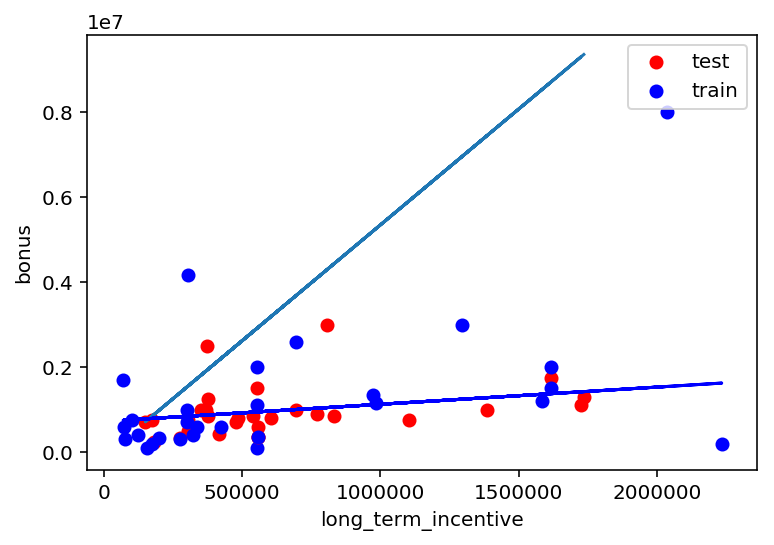

[ 0.40364065] 723040.817416


In [39]:
#异常值对回归造成很大的影响：如果它落在训练集内，它可能显著影响斜率/截距。如果它落在测试集内，它可能比落在测试集外要使分数低得多。
#

import matplotlib.pyplot as plt
for feature2, target2 in zip(feature_test2, target_test2):
    plt.scatter( feature2, target2, color=test_color ) 
for feature2, target2 in zip(feature_train2, target_train2):
    plt.scatter( feature2, target2, color=train_color ) 

### labels for the legend
plt.scatter(feature_test2[0], target_test2[0], color=test_color, label="test")
plt.scatter(feature_test2[0], target_test2[0], color=train_color, label="train")


### draw the regression line, once it's coded
try:
    plt.plot( feature_test2, reg.predict(feature_test2) )
except NameError:
    pass
reg2.fit(feature_test2, target_test2)
plt.plot(feature_train2, reg2.predict(feature_train2), color="b") 

plt.xlabel(features_list2[1])
plt.ylabel(features_list2[0])
plt.legend()
plt.show()

print  reg2.coef_ , reg2.intercept_

# Class 5 : outliers

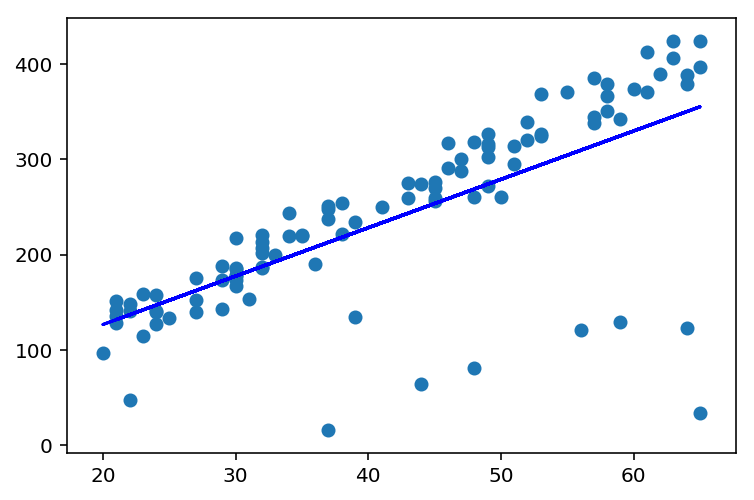

In [42]:
import random
import numpy
import matplotlib.pyplot as plt
import pickle

### load up some practice data with outliers in it
ages = pickle.load( open("./ud120-projects/outliers/practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("./ud120-projects/outliers/practice_outliers_net_worths.pkl", "r") )


### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(ages_train, net_worths_train)

try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()

In [43]:
print reg.coef_, reg.intercept_ 
print reg.score(ages_test, net_worths_test)

[[ 5.07793064]] [ 25.21002155]
0.878262470366


In [54]:
# predictions 是一个列表，包含回归的预测目标；
# ages 也是一个列表，包含训练集内的年龄；
# net_worths 是训练集内净值的实际值
# cleaned_data 的格式应为一个元组列表，其中每个元组的形式均为 (age, net_worth, error)
def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    cleaned_data = []
    
    number = len(ages)
    id_max = int(0.9*number)
    
    for i in range(number):
        tmp = (ages[i], net_worths[i], abs(predictions[i]-net_worths[i]))
        cleaned_data.append(tmp)
        
    cleaned_data = sorted(cleaned_data, key=lambda x:x[2])[0:id_max]
    return cleaned_data

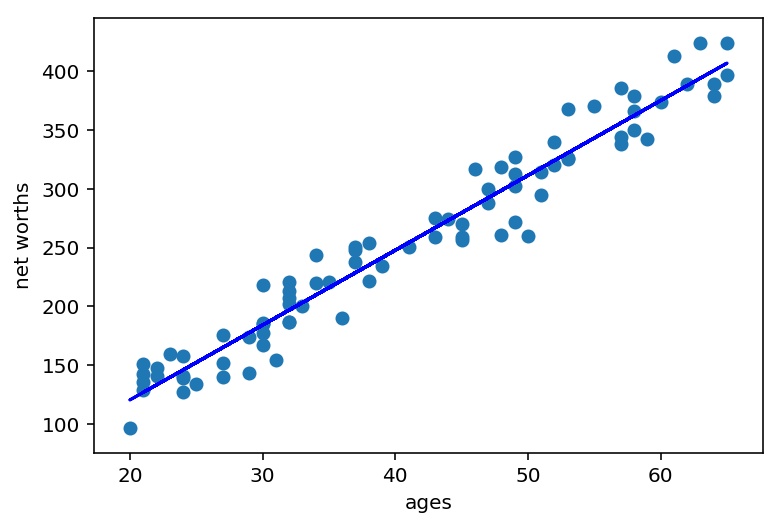

In [55]:

### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train) 
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train ) #注意此处输入的是训练数据
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"


### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"

In [56]:
print reg.coef_, reg.intercept_ 
print reg.score(ages_test, net_worths_test)

[[ 6.36859481]] [-6.91861069]
0.983189455396


## enron_outliers

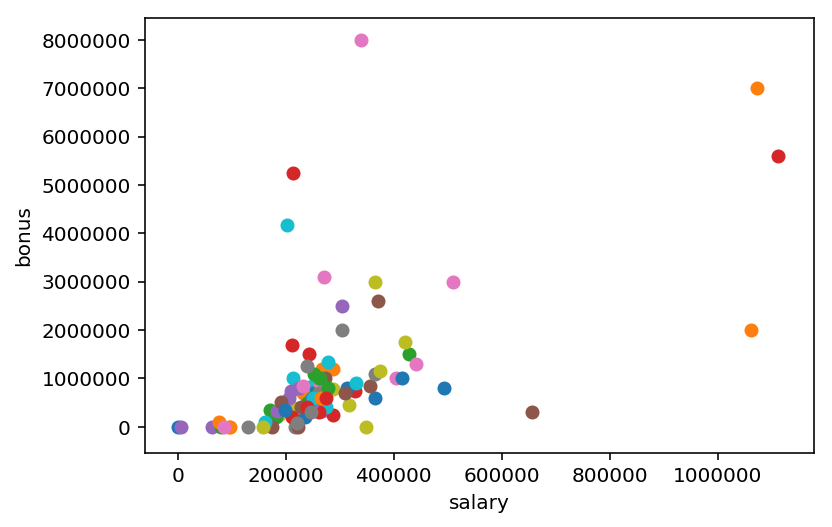

In [62]:
import pickle
import sys
import matplotlib.pyplot
sys.path.append("./ud120-projects/tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("./ud120-projects/final_project/final_project_dataset.pkl", "r") )
data_dict.pop( 'TOTAL', 0 ) # TOTAL 存储的是所有人的总和，因此为异常值.
# 'SKILLING JEFFREY K' 与 'LAY KENNETH L'是ENRON 老总，因此他们的工资与奖金虽然数量大，但是不作为异常值.

features = ["salary", "bonus"]
data = featureFormat(data_dict, features)


### your code below
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

# Class 6 : k_means_cluster

In [6]:
""" 
    Skeleton code for k-means clustering mini-project.
"""
import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("./ud120-projects/tools/")

In [7]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    #plt.savefig(name)
    plt.show()

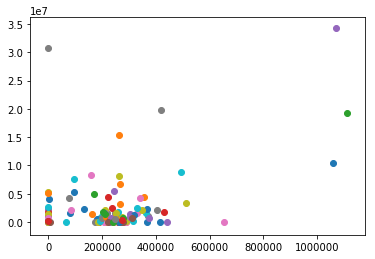

In [8]:
from feature_format import featureFormat, targetFeatureSplit

### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("./ud120-projects/final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

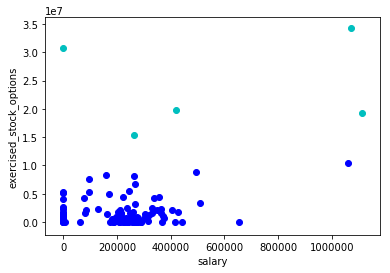

In [12]:
### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(finance_features)

pred = kmeans.predict()

### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"


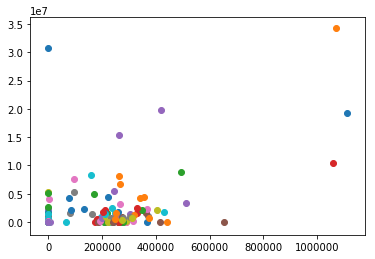

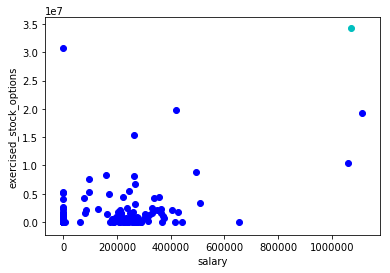

In [13]:
### 三个参数的聚类

from feature_format import featureFormat, targetFeatureSplit

### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("./ud120-projects/final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2, _ in finance_features:
    plt.scatter( f1, f2 )
plt.show()


### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(finance_features)

pred = kmeans.predict(finance_features)

### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"


In [18]:
exercised_stock_options = [item for item in [data_dict[k]['exercised_stock_options'] for k in data_dict.keys()] if item!='NaN']
print exercised_stock_options, max(exercised_stock_options), min(exercised_stock_options)

[6680544, 4890344, 651850, 5538001, 493489, 1104054, 5210569, 880290, 2282768, 765313, 2218275, 372205, 1056320, 185063, 1030329, 4346544, 81042, 3285, 1441898, 1465734, 1635238, 98718, 601438, 850477, 664375, 4158995, 1624396, 2027865, 436515, 4046157, 371750, 607837, 1835558, 1624396, 412878, 17378, 3282960, 1623010, 2291113, 1362375, 139130, 2549361, 34348384, 1637034, 757301, 83237, 506765, 187500, 759557, 1753766, 608750, 9803, 664461, 59539, 7509039, 1599641, 953136, 1451869, 4452476, 343434, 19794175, 850010, 117551, 5266578, 19250000, 1426469, 886231, 28798, 2022048, 1324578, 1668260, 1297049, 5127155, 1729541, 281073, 431750, 257817, 754966, 4160672, 8191755, 2604490, 825464, 192758, 400478, 636246, 8308552, 30766064, 1550019, 8831913, 10433518, 15364167, 176378, 940257, 671737, 2165172, 591250, 2070306, 2542813, 3181250, 765920, 384728] 34348384 3285


In [19]:
salary = [item for item in [data_dict[k]['salary'] for k in data_dict.keys()] if item!='NaN']
print salary, max(salary), min(salary)

[365788, 267102, 170941, 243293, 267093, 370448, 197091, 130724, 288589, 248546, 257486, 288542, 251654, 288558, 63744, 357091, 271442, 304110, 187922, 213625, 249201, 231330, 182245, 211788, 224305, 273746, 339288, 216582, 210500, 272880, 477, 269076, 428780, 211844, 206121, 174246, 510364, 365038, 365163, 162779, 236457, 1072321, 261516, 329078, 184899, 192008, 263413, 262663, 374125, 278601, 199157, 96840, 80818, 213999, 210692, 222093, 440698, 240189, 420636, 275101, 314288, 94941, 239502, 1111258, 6615, 655037, 404338, 259996, 317543, 201955, 248146, 76399, 262788, 261809, 248017, 229284, 231946, 221003, 158403, 250100, 492375, 1060932, 261879, 239671, 304588, 309946, 85274, 247338, 349487, 330546, 415189, 265214, 278601, 274975] 1111258 477


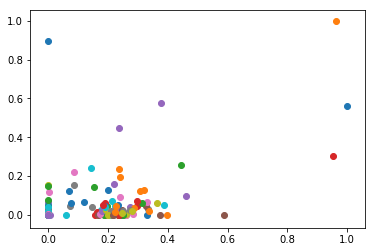

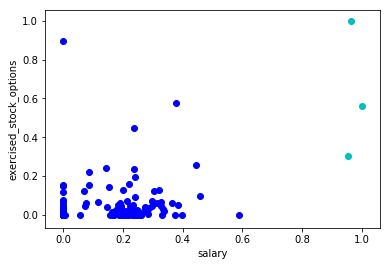

In [33]:
### 特征缩放

from feature_format import featureFormat, targetFeatureSplit
from sklearn.preprocessing import MinMaxScaler

### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("./ud120-projects/final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

# 特征变换
min_max_scaler = MinMaxScaler()
features_minmax = min_max_scaler.fit_transform(finance_features)

for f1, f2, _ in features_minmax:
    plt.scatter( f1, f2 )
plt.show()


### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(features_minmax)

pred = kmeans.predict(features_minmax)

### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, features_minmax, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"

# Class 7 : text_learning

In [2]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import *
import string

def parseOutText(f):
    """ given an opened email file f, parse out all text below the
        metadata block at the top
        (in Part 2, you will also add stemming capabilities)
        and return a string that contains all the words
        in the email (space-separated) 
        
        example use case:
        f = open("email_file_name.txt", "r")
        text = parseOutText(f)
        
        """
    f.seek(0)  ### go back to beginning of file (annoying)
    all_text = f.read()

    ### split off metadata
    content = all_text.split("X-FileName:")
    words = ""
    if len(content) > 1:
        ### remove punctuation
        text_string = content[1].translate(string.maketrans("", ""), string.punctuation)
        
        #注意此处：换行时，如果直接去除\n则会导致与下一行的单词混合；
        # 因此先替换为空格，再通过  ''.join(str.split())会去除连续空格的原理，去除多余的空格.
        #-----text_string = text_string.replace('\n', ' ') 
        #??
        
        text_string_list = text_string.lower().split() #

        ### project part 2: comment out the line below
        #words = text_string

        ### split the text string into individual words, stem each word,
        ### and append the stemmed word to words (make sure there's a single
        ### space between each stemmed word)
        stemmer = SnowballStemmer("english")
        singles = [stemmer.stem(text) for text in text_string_list]
        
        words = ' '.join(singles) #
    return words

    

def main():
    ff = open("./ud120-projects/text_learning/test_email.txt", "r")
    text = parseOutText(ff)
    print text

main()

hi everyon if you can read this messag your proper use parseouttext pleas proceed to the next part of the project


In [9]:
import os
import pickle
import re
import sys

sys.path.append( "./ud120-projects/tools/" )
#from parse_out_email_text import parseOutText

"""
    Starter code to process the emails from Sara and Chris to extract
    the features and get the documents ready for classification.

    The list of all the emails from Sara are in the from_sara list
    likewise for emails from Chris (from_chris)

    The actual documents are in the Enron email dataset, which
    you downloaded/unpacked in Part 0 of the first mini-project. If you have
    not obtained the Enron email corpus, run startup.py in the tools folder.

    The data is stored in lists and packed away in pickle files at the end.
"""


from_sara  = open("./ud120-projects/text_learning/from_sara.txt", "r")
from_chris = open("./ud120-projects/text_learning/from_chris.txt", "r")

from_data = []
word_data = []

### temp_counter is a way to speed up the development--there are
### thousands of emails from Sara and Chris, so running over all of them
### can take a long time
### temp_counter helps you only look at the first 200 emails in the list so you
### can iterate your modifications quicker
temp_counter = 0

for name, from_person in [("sara", from_sara), ("chris", from_chris)]:
    for path in from_person:
        ### only look at first 200 emails when developing
        ### once everything is working, remove this line to run over full dataset
        #temp_counter += 1
        #if temp_counter < 200:
            path = os.path.join('./ud120-projects/', path[:-1])
            #print path
            
            email = open(path, "r")

            ### use parseOutText to extract the text from the opened email
            text = parseOutText(email)

            ### use str.replace() to remove any instances of the words
            ### ["sara", "shackleton", "chris", "germani"]
            for reject_word in ["sara", "shackleton", "chris", "germani", "sshacklensf", "cgermannsf"]:
                text = text.replace(reject_word, '')

            #------text = text.strip().replace('  ', '')

            ### append the text to word_data
            word_data.append(text)

            ### append a 0 to from_data if email is from Sara, and 1 if email is from Chris
            if name=='sara':
                from_data.append(0)
            elif name=='chris':
                from_data.append(1)

            email.close()

print "emails processed"
from_sara.close()
from_chris.close()

pickle.dump( word_data, open("your_word_data.pkl", "w") )
pickle.dump( from_data, open("your_email_authors.pkl", "w") )


emails processed


In [78]:
print word_data[152]

tjonesnsf stephani and sam need nymex calendar


In [3]:
## in Part 4, do TfIdf vectorization here
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(word_data)

len(vectorizer.get_feature_names())

38757

In [4]:
vectorizer.get_feature_names()[34597]

u'stephaniethank'

# Class 8 : feature_selection

In [10]:
import pickle
import numpy
numpy.random.seed(42)


### The words (features) and authors (labels), already largely processed.
### These files should have been created from the previous (Lesson 10)
### mini-project.
words_file = "your_word_data.pkl" 
authors_file = "your_email_authors.pkl"
word_data = pickle.load( open(words_file, "r"))
authors = pickle.load( open(authors_file, "r") )



### test_size is the percentage of events assigned to the test set (the
### remainder go into training)
### feature matrices changed to dense representations for compatibility with
### classifier functions in versions 0.15.2 and earlier
from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(word_data, authors, test_size=0.1, random_state=42)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                             stop_words='english')
features_train = vectorizer.fit_transform(features_train)
features_test  = vectorizer.transform(features_test).toarray()

In [11]:
### a classic way to overfit is to use a small number
### of data points and a large number of features;
### train on only 150 events to put ourselves in this regime
features_train = features_train[:150].toarray()
labels_train   = labels_train[:150]

In [12]:
# 较少训练样本的情况下的准确率（过拟合情况）
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(min_samples_split=40)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

acc = accuracy_score(pred, labels_test)
print "ACC:{0}".format(acc)

ACC:0.816268486917


In [13]:
# 返回重要性很大的特征对应的id号---可能为异常特征需要剔除
# (回到上一节的处理函数内删除对应的单词)
print [ii for ii in range(len(clf.feature_importances_)) if clf.feature_importances_[ii] > 0.2]

[18849, 21323]


In [15]:
print vectorizer.get_feature_names()[21323]

houectect


# Class 9 : PCA

In [ ]:
# 见 /pca/eigenfaces.py文件

# Class 10 : validation

In [21]:
"""
    Starter code for the validation mini-project.
    The first step toward building your POI identifier!

    Start by loading/formatting the data

    After that, it's not our code anymore--it's yours!
"""

import pickle
import sys
sys.path.append("./ud120-projects/tools/")
from feature_format import featureFormat, targetFeatureSplit

data_dict = pickle.load(open("./ud120-projects/final_project/final_project_dataset.pkl", "r") )

### first element is our labels, any added elements are predictor
### features. Keep this the same for the mini-project, but you'll
### have a different feature list when you do the final project.
features_list = ["poi", "salary"]

data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)

### it's all yours from here forward!  
from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(
    features, labels, test_size=0.3, random_state=42)


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier()
clf.fit(features_train, labels_train)

pred = clf.predict(features_test)

acc = accuracy_score(pred, labels_test)
print "ACC:{0}".format(acc)

ACC:0.724137931034
